# Trabajando con Series temporales

En el mundo del Data Science es muy frecuente encontrarse en situaciones en las que debemos analizar series temporales, esto es, datos que tienen asociado siempre una marca de tiempo. Estas series suelen tener gran cantidad de datos, con lo que a veces resulta complicado trabajar con ellas.

Veamos como hacer esto en Pandas.



## Índice

- [Introducción](#Introducci%C3%B3n)
- [Cargando los datasets](#Cargando-los-datasets)
- [Series temporales](#Series-temporales-o-timeseries)
- [DataFrame](#DataFrame)
- [Remuestreo](#Remuestreo)

## Introducción

Vamos a ver como ejemplo, dos series temporales, la [oscilación ártica](http://en.wikipedia.org/wiki/Arctic_oscillation) y la [oscilación del Atlántico Norte](http://en.wikipedia.org/wiki/North_Atlantic_oscillation), obtendremos los datasets para trabajar con ellos.

Empezamos:

In [64]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
pd.set_option('display.max_rows',15) # Establecemos el maximo de filas a 15

Activamos los gráficos inline para este notebook

In [65]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Vamos a empezar a cargar datos

## Cargando los datasets

Podemos obtener el primer dataset accediendo a este [enlace](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii) o utilizando el siguiente comando en Linux o en Mac:



In [66]:
#!curl http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii >> 'monthly.ao.index.b50.current.ascii'
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii

--2018-02-07 07:08:50--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 140.90.101.63
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.63|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20425 (20K) [text/plain]
Saving to: ‘monthly.ao.index.b50.current.ascii.1’

monthly.ao.index.b5 100%[=====================>]  19.95K  --.-KB/s   in 0.1s   

2018-02-07 07:08:50 (160 KB/s) - ‘monthly.ao.index.b50.current.ascii.1’ saved [20425/20425]



Cargamos el dataset en un array numPy con el método `loadtxt()`

In [74]:
ao = np.loadtxt('monthly.ao.index.b50.current.ascii')
ao

array([[ 1.9500e+03,  1.0000e+00, -6.0310e-02],
       [ 1.9500e+03,  2.0000e+00,  6.2681e-01],
       [ 1.9500e+03,  3.0000e+00, -8.1275e-03],
       ...,
       [ 2.0170e+03,  1.1000e+01, -7.7573e-02],
       [ 2.0170e+03,  1.2000e+01, -5.8978e-02],
       [ 2.0180e+03,  1.0000e+00, -2.8084e-01]])

Cada línea en el fichero consiste de tres elementos: año, mes y valor:

In [76]:
ao[0:2]

array([[ 1.9500e+03,  1.0000e+00, -6.0310e-02],
       [ 1.9500e+03,  2.0000e+00,  6.2681e-01]])

Y la forma del array:

In [78]:
ao.shape

(817, 3)

## Series temporales o timeseries

Vamos a convertir estos datos en series temporales, que puedan ser manipuladas de forma natural y sencilla. El primero paso que tenemos que hacer es crear el rango de fechas para nuestra serie temporal. Viendo el fichero es sencillo, vemos que el primer registro es Enero 1959 y generar tantos timestamps como registros. La frecuencia de los datos es mensual.

In [80]:
fechas = pd.date_range('1950-01', periods=ao.shape[0], freq='M')
fechas

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
               '2017-12-31', '2018-01-31'],
              dtype='datetime64[ns]', length=817, freq='M')

Aqui estamos generando un periodo mensual desde el inicio del primer registro hasta el ultimo. 

Ahora podemos empezar a crear nuestra primera serie temporal. Las fechas de las variables fecha acturaran de índice y los valores AO, pues eso, los valores.

In [83]:
AO = Series(ao[:,2], index=fechas)
AO

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-07-31   -0.802480
                ...   
2017-07-31    0.634230
2017-08-31    0.150040
2017-09-30   -0.492450
2017-10-31    0.690340
2017-11-30   -0.077573
2017-12-31   -0.058978
2018-01-31   -0.280840
Freq: M, Length: 817, dtype: float64

Vamos a dibujar la serie

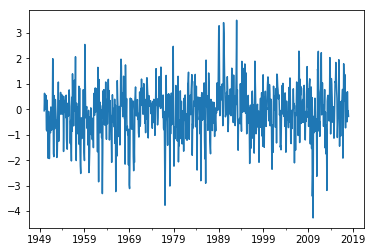

In [85]:
AO.plot()

O una parte solo:

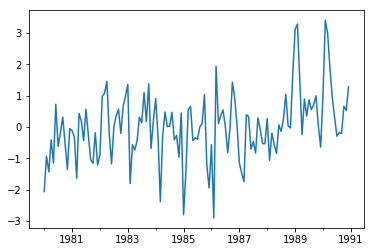

In [86]:
AO['1980':'1990'].plot()

A nivel de mes

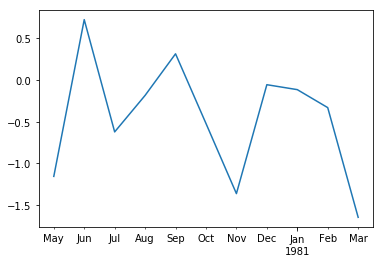

In [88]:
AO['1980-05':'1981-03'].plot()

Como vemos el acceso a las series temporales es muy sencillo e intuitivo. Podemos acceder por índice numérico

In [90]:
AO[120]

-2.4842

Por índice de fecha:

In [91]:
AO['1960-01']

1960-01-31   -2.4842
Freq: M, dtype: float64

Un año entero

In [92]:
AO['1960']

1960-01-31   -2.484200
1960-02-29   -2.212400
1960-03-31   -1.624600
1960-04-30   -0.297310
1960-05-31   -0.857430
1960-06-30    0.054978
1960-07-31   -0.619060
1960-08-31   -1.007900
1960-09-30   -0.381640
1960-10-31   -1.187000
1960-11-30   -0.553230
1960-12-31   -0.342950
Freq: M, dtype: float64

Como siempre, podemos realizar accesos condicionales

In [94]:
AO[AO > 0]

1950-02-28    0.626810
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-09-30    0.357970
1951-07-31    0.090023
1951-12-31    1.987200
                ...   
2017-01-31    0.941970
2017-02-28    0.339860
2017-03-31    1.365400
2017-06-30    0.401660
2017-07-31    0.634230
2017-08-31    0.150040
2017-10-31    0.690340
Length: 381, dtype: float64

## DataFrame

Vamos a añadir más datos, el segundo dataset. Podemos descargar el segundo dataset desde [aqui](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii) o con el siguiente comando

In [ ]:
#!curl http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii >> 'norm.nao.monthly.b5001.current.ascii'
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii

Cargamos el dataset como hemos hecho en el caso del primero:

In [97]:
nao = np.loadtxt('norm.nao.monthly.b5001.current.ascii')
fechas_nao = pd.date_range('1950-01', periods=nao.shape[0], freq='M')
NAO = Series(nao[:,2], index=fechas_nao)
NAO

1950-01-31    0.920000
1950-02-28    0.400000
1950-03-31   -0.360000
1950-04-30    0.730000
1950-05-31   -0.590000
1950-06-30   -0.060000
1950-07-31   -1.260000
                ...   
2017-07-31    1.255600
2017-08-31   -1.097700
2017-09-30   -0.612730
2017-10-31    0.185940
2017-11-30   -0.004898
2017-12-31    0.881580
2018-01-31    1.442300
Freq: M, Length: 817, dtype: float64

El período de tiempo es identico en los dos datasets:

In [98]:
NAO.index

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
               '2017-12-31', '2018-01-31'],
              dtype='datetime64[ns]', length=817, freq='M')


Podemos crear ahora un DataFrame que contenga los datos de AO y NAO. 

In [ ]:
aonao = DataFrame({'AO' : AO, 'NAO' : NAO})

# Forma alternativa de crear el DataFrame
'''
ao_df = pd.read_table('monthly.ao.index.b50.current.ascii', sep='\s+', header=None,)
nao_df = pd.read_table('norm.nao.monthly.b5001.current.ascii', sep='\s+', header=None,)
ao_nao_df = pd.merge(ao_df, nao_df, on=[0, 1])
ao_nao_df.columns = ['Año', 'Mes', 'AO', 'NAO']
ao_nao_df.head()
'''

Vamos a dibujar el DataFrame

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fddd1c64e80>,
      dtype=object)

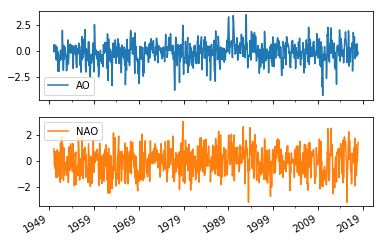

In [112]:
aonao.plot(subplots=True)

Podemos referenciar cada columna por el nombre

In [114]:
aonao['NAO']

1950-01-31    0.920000
1950-02-28    0.400000
1950-03-31   -0.360000
1950-04-30    0.730000
1950-05-31   -0.590000
1950-06-30   -0.060000
1950-07-31   -1.260000
                ...   
2017-07-31    1.255600
2017-08-31   -1.097700
2017-09-30   -0.612730
2017-10-31    0.185940
2017-11-30   -0.004898
2017-12-31    0.881580
2018-01-31    1.442300
Freq: M, Name: NAO, Length: 817, dtype: float64

O directamente como método del DataFrame

In [115]:
aonao.NAO

1950-01-31    0.920000
1950-02-28    0.400000
1950-03-31   -0.360000
1950-04-30    0.730000
1950-05-31   -0.590000
1950-06-30   -0.060000
1950-07-31   -1.260000
                ...   
2017-07-31    1.255600
2017-08-31   -1.097700
2017-09-30   -0.612730
2017-10-31    0.185940
2017-11-30   -0.004898
2017-12-31    0.881580
2018-01-31    1.442300
Freq: M, Name: NAO, Length: 817, dtype: float64

Como siempre, podemos hacer queries complejas sobre este DataFrame, como obtener todos los valores de NAO negavitos en meses positivos de AO entre dos fechas:

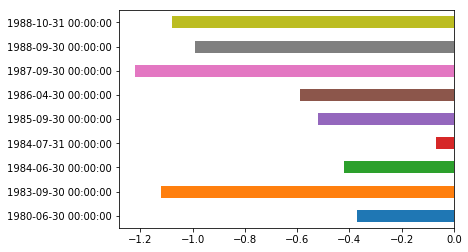

In [116]:
import datetime
aonao.loc[(aonao.AO > 0) & (aonao.NAO < 0) 
        & (aonao.index > datetime.datetime(1980,1,1)) 
        & (aonao.index < datetime.datetime(1989,1,1)),
        'NAO'].plot(kind='barh')

## Remuestreo

Pandas provee un método sencillo para remuestrear los datos a una frecuencia de datos diferente. Dos parámetros para remuestrear son el periódo de tiempo al que queremos cambiar y el método a usar para hacerlo. Por defecto el método es la media. El siguiente ejemplo calcula la media anual "A".


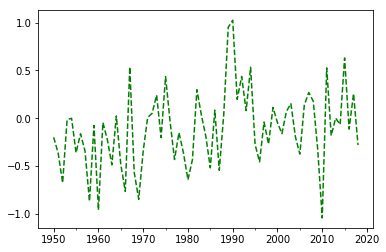

In [117]:
AO_mm = AO.resample("A").mean()
AO_mm.plot(style='g--')

Con la mediana:

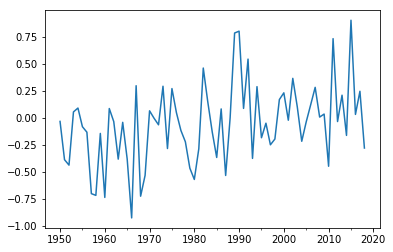

In [118]:
AO_mm = AO.resample("A").median()
AO_mm.plot()


Podemos usar nuestros propios metodos para remuestreo, por ejemplo, `np.max` para cambiar el remuestreo, en este caso a 3 años (3A)

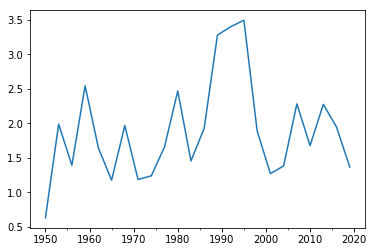

In [119]:
AO_mm = AO.resample("3A").apply(np.max)
AO_mm.plot()

También podemos usar varias funciones para el remuestreo

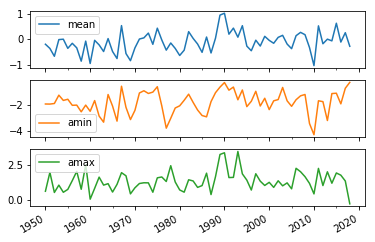

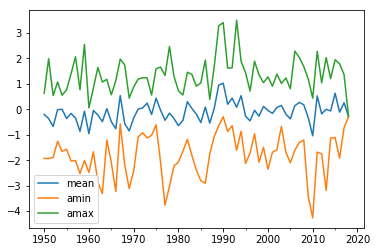

In [120]:
AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
AO_mm['1900':'2020'].plot(subplots=True)
AO_mm['1900':'2020'].plot()